In [1]:
from utils.utils import preprocess_watch_data
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from math import sin,cos
from numpy import random
import sys
from utils.utils import preprocess_watch_data
from utils.utils import get_yaw_pitch_roll
from utils.utils import get_rotation_matrix_from_yaw_pitch_roll
from utils.utils import get_rotated_basis
from utils.utils import get_tilt_correction_rotation_matrix_from_accelerometer
import numpy as np
import pandas as pd

df = preprocess_watch_data("GoogleDrive/delta/4/raw.csv",save=False,plot=False)
df = df.fillna(method='ffill')

[ 0.06922913 -0.10813904 -0.99639893]
[-0.00061633  0.0005405  -0.004657  ]
[ 0.08244324 -0.10289001 -1.01580811]
[-0.00152004  0.00299912 -0.02443111]
[ 0.07228088 -0.11851501 -1.00292969]
[ 0.00300517  0.00156614 -0.01254659]
[ 0.07618713 -0.1192627  -0.99575806]
[ 0.00320551  0.00099948 -0.00578811]
[ 0.07296753 -0.11549377 -0.99584961]
[ 0.0033149   0.0008507  -0.00519498]
[ 0.06874084 -0.11557007 -0.99453735]
[ 0.00365709  0.00057993 -0.00359627]
[ 0.07197571 -0.11985779 -0.99058533]
[ 0.00389275  0.00025598 -0.00039714]
[ 0.07624817 -0.11917114 -0.99101257]
[ 0.00380767  0.00034007 -0.00105823]
[ 0.07597351 -0.11476135 -0.99380493]
[ 0.0036901   0.00059574 -0.00329857]
[ 0.07246399 -0.11567688 -0.9959259 ]
[ 0.00359562  0.0008225  -0.00525449]
[ 0.07070923 -0.11808777 -0.99560547]
[ 0.00367049  0.00078023 -0.00509183]
[ 0.07533264 -0.11810303 -0.99443054]
[ 0.00357993  0.0006686  -0.00426318]
[ 0.07752991 -0.11524963 -0.99142456]
[ 0.00374805  0.00029015 -0.00110574]
[ 0.07247925

CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '360x360', '-pix_fmt', 'rgba', '-r', '100', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-vcodec', 'libx264', '-y', 'figures/basic_animation.mp4']' returned non-zero exit status 255.

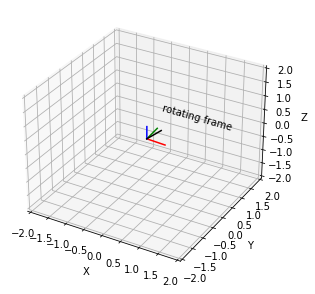

In [5]:
acc = np.array(df[['acc_x','acc_y','acc_z']])
omega = np.array(df[['gyr_x','gyr_y','gyr_z']])
time = df['gyr_t']
yaw_pitch_rolls = [np.zeros(3)]
Rs = [np.eye(3,3)]
R_tilts = [np.eye(3,3)]
bases = [np.eye(3,3)]
velocities = [np.zeros(3)]
positions = [np.zeros(3)]

for i,_ in enumerate(time):
    if (i==0):
        # don't have delta t, next
        continue
    delta_t = time[i]-time[i-1]
    yaw_pitch_roll = get_yaw_pitch_roll(i,omega,time,yaw_pitch_rolls)
    yaw_pitch_rolls.append(yaw_pitch_roll)
    R_tilt = get_tilt_correction_rotation_matrix_from_accelerometer(acc[i])
    R = get_rotation_matrix_from_yaw_pitch_roll(*yaw_pitch_roll)
    Rs.append(R)
    R_tilts.append(R_tilt)
    R = R @ R_tilt
    acc_global = R @ acc[i]
    print(acc[i])
    acc_global = acc_global + np.array([0,0,1])
    print(acc_global)
    velocity = acc_global*delta_t + velocities[i-1]
    velocities.append(velocity)
    position = velocity*delta_t + positions[i-1]
    positions.append(position)
    bases.append(get_rotated_basis(bases[0],R))

from utils.utils import animate_trajectory
animate_trajectory(time,bases,trajectory=positions)

# np.save('rpy.npy',np.array(yaw_pitch_rolls))
# np.save('pos.npy',np.array(positions))

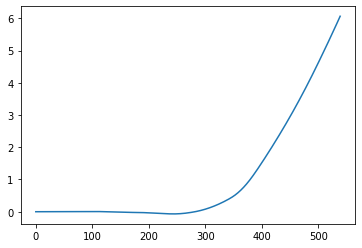

In [6]:
p = np.array(positions).T
t = np.arange(len(p.T))
x = p[0]
y = p[1]
# ax = plt.figure().add_subplot(projection='3d')

plt.plot(y)